In [9]:
# Import the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Traditional Machine Learning
from sklearn.tree import DecisionTreeClassifier

# Deep Learning Setup
import tensorflow as tf
from tensorflow.keras.models import Sequential           # Sequential model: stack layers linearly
from tensorflow.keras.layers import Dense, Input         # Dense: fully connected layer, Input: define input shape
from tensorflow.keras.optimizers import Adam             # Adam: an efficient optimizer for training
import warnings
warnings.filterwarnings("ignore")

# Set seeds for reproducibility
import random
seed_value = 42  # Choose any seed value you want
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
# Define the path to your local file (use the direct download link)
PATH = r"https://drive.google.com/uc?export=download&id=1TWadG13vxtu7-QGFDvh7mas6l_8DAfAM"

# Read the CSV file
try:
    # Try reading with different delimiters and engines
    try:
        df = pd.read_csv(PATH) # Default comma delimiter
        print("File loaded successfully with default delimiter!")
    except Exception as e_comma:
        print(f"Error with default delimiter: {e_comma}")
        try:
            df = pd.read_csv(PATH, delimiter=';') # Try semicolon
            print("File loaded successfully with semicolon delimiter!")
        except Exception as e_semicolon:
            print(f"Error with semicolon delimiter: {e_semicolon}")
            try:
                df = pd.read_csv(PATH, delimiter='\t') # Try tab
                print("File loaded successfully with tab delimiter!")
            except Exception as e_tab:
                 print(f"Error with tab delimiter: {e_tab}")
                 try:
                    df = pd.read_csv(PATH, delimiter='|') # Try pipe
                    print("File loaded successfully with pipe delimiter!")
                 except Exception as e_pipe:
                    print(f"Error with pipe delimiter: {e_pipe}")
                    # If none of the above work, try specifying the engine
                    try:
                        df = pd.read_csv(PATH, engine='python')
                        print("File loaded successfully with python engine!")
                    except Exception as e_python:
                        print(f"Error with python engine: {e_python}")
                        raise e_comma # Re-raise the original error if all failed


    print("\nFirst 5 rows of the dataset:")
    print(df.head())
    print("\nDataset info:")
    print(df.info())
    print("\nBasic statistics:")
    print(df.describe())

except FileNotFoundError:
    print(f"Error: The file at path {PATH} was not found.")
except Exception as e:
    print(f"An error occurred while reading the file: {e}")

File loaded successfully with default delimiter!

First 5 rows of the dataset:
                                             Address    Rent  Beds  Baths  \
0  The Gate Tower 2, The Gate Tower, Shams Gate D...  124000     3      4   
1                Water's Edge, Yas Island, Abu Dhabi  140000     3      4   
2            Al Raha Lofts, Al Raha Beach, Abu Dhabi   99000     2      3   
3  Marina Heights, Marina Square, Al Reem Island,...  220000     3      4   
4                    West Yas, Yas Island, Abu Dhabi  350000     5      7   

        Type  Area_in_sqft  Rent_per_sqft Rent_category Frequency  \
0  Apartment          1785      69.467787        Medium    Yearly   
1  Apartment          1422      98.452883        Medium    Yearly   
2  Apartment          1314      75.342466        Medium    Yearly   
3  Penthouse          3843      57.246942          High    Yearly   
4      Villa          6860      51.020408          High    Yearly   

    Furnishing   Purpose Posted_date  Age_o

In [10]:
# Create QHS_Clean DataFrame with selected columns
QHS_Clean = df[['Rent', 'Beds', 'Baths', 'Type', 'Area_in_sqft', 'Furnishing', 'Location', 'Latitude', 'Longitude']].copy()

# Display the first 5 rows of the new DataFrame
print("QHS_Clean DataFrame:")
QHS_Clean.head(50)

QHS_Clean DataFrame:


,Rent,Beds,Baths,Type,Area_in_sqft,Furnishing,Location,Latitude,Longitude
0,124000,3,4,Apartment,1785,Unfurnished,Al Reem Island,24.493598,54.407841
1,140000,3,4,Apartment,1422,Unfurnished,Yas Island,24.494022,54.607372
2,99000,2,3,Apartment,1314,Furnished,Al Raha Beach,24.485931,54.600939
3,220000,3,4,Penthouse,3843,Unfurnished,Al Reem Island,24.493598,54.407841
4,350000,5,7,Villa,6860,Unfurnished,Yas Island,24.494022,54.607372
5,75000,1,1,Apartment,706,Furnished,Al Reem Island,24.493598,54.407841
6,65000,1,1,Apartment,698,Unfurnished,Yas Island,24.494022,54.607372
7,170000,3,4,Townhouse,1989,Unfurnished,Yas Island,24.494022,54.607372
8,75000,1,2,Apartment,886,Unfurnished,Yas Island,24.494022,54.607372
9,160000,2,3,Apartment,1430,Unfurnished,Al Reem Island,24.493598,54.407841


# Data Frame Variable Descriptions

Rent: The annual rental price of the property (in local currency, likely AED).

Beds: The number of bedrooms in the property.

Baths: The number of bathrooms in the property.

Type: The type of property (e.g., Apartment, Penthouse, Villa, Townhouse).

Area_in_sqft: The total area of the property, measured in square feet.

Furnishing: Indicates whether the property is Furnished or Unfurnished.

Location: The general location or neighborhood where the property is situated.

Latitude: The geographic latitude coordinate of the property’s location.

Longitude: The geographic longitude coordinate of the property’s location.


# We train our model with these data for:

## Accurate Price Estimation:
Machine learning models rely on historical data to learn the relationships between property features (like size, location, number of bedrooms, etc.) and rental prices. By feeding your model with detailed, relevant features, you enable it to make more precise predictions for new apartment listings.

## Feature Importance:
Each variable contributes differently to the rental price. For example, location, size, and number of bedrooms are often among the most influential factors. Training the model with a comprehensive set of features ensures it captures these relationships and can weigh their importance appropriately.

# Model Generalization:
A well-trained model can generalize from our dataset to new, unseen properties, making it useful for real-world applications. The more representative and diverse our training data, the better your model will perform on new inputs.

# Feature Engineering and Selection:
Selecting and engineering the right features—like combining location coordinates with area or furnishing status—can significantly boost our model’s predictive power and reduce errors.

# Reduced Bias and Overfitting:
Including a wide range of relevant features helps prevent the model from overfitting to a narrow set of data, leading to more reliable and generalizable predictions.

##Descriptive statistics of the chosen variables

In [11]:
QHS_Clean.describe()

,Rent,Beds,Baths,Area_in_sqft,Latitude,Longitude
count,999.000000,999.000000,999.000000,999.000000,989.000000,989.000000
mean,111077.123123,2.386386,3.276276,2165.549550,24.443225,54.574094
std,76026.203549,1.654790,1.946104,2078.488799,0.080333,0.267808
min,12000.000000,0.000000,1.000000,260.000000,23.652035,53.704662
25%,60000.000000,1.000000,2.000000,1000.000000,24.420065,54.407841
50%,90000.000000,2.000000,3.000000,1500.000000,24.469344,54.574954
75%,150000.000000,3.000000,4.000000,2412.000000,24.493598,54.607372
max,900000.000000,10.000000,11.000000,20677.000000,24.843269,55.767081


## Interpretation of the descriptive datasets

Our dataset is capturing nearly complete information on 999 rental properties with only minimal missing geographic data on 10 records. This represents excellent data quality that we could analyze.

#What Our Data on Rental Market Reveals
The rental prices in our dataset tell a compelling story. With an average rent of $111,077 significantly higher than the median of $90,000, our market clearly includes a substantial luxury segment that's driving up the mean. This 23% difference between mean and median indicates we are dealing with a market that has considerable upward price pressure from high-end properties.

Our rental range is quite remarkable - spanning from $12,000 to $900,000 annually. That maximum rent of $900,000 represents 75 times the minimum rent, showing that our dataset captures everything from basic accommodations to ultra-luxury properties or high-end commercial spaces.

#Property Configuration Patterns
What's particularly interesting in our data is the bathroom-to-bedroom ratio. Oour properties average 2.39 bedrooms but 3.28 bathrooms - that's 1.37 bathrooms per bedroom, which is notably high. This pattern suggests our portfolio includes properties designed for the UAE market, where additional powder rooms and en-suite facilities are standard in quality developments.

The range from studio apartments to 10-bedroom estates with 11 bathrooms indicates you're working with a diverse property mix that serves multiple market segments.

#Size and Space Analysis
Our property sizes show remarkable diversity. With areas ranging from 260 to 20,677 square feet and a mean of 2,166 square feet, you're clearly dealing with a portfolio that includes residential units alongside potentially commercial or mixed-use properties. That coefficient of variation of 96% tell us that the dataset represents true market diversity rather than a narrow property type.

#Geographic Concentration
Our properties are tightly clustered geographically, which is excellent for market analysis. The coordinates place our portfolio squarely within what appears to be the greater Dubai metropolitan area, with very low geographic dispersion. This concentration means our analysis reflects a coherent market rather than scattered regional data.

#Market Segmentation Insights
Based on our data, we can identify three distinct market tiers in our portfolio:

Budget Segment (25% of properties): Under $60,000 annually - likely representing older units, smaller apartments, or properties in developing areas.

Core Market (50% of properties): $60,000-$150,000 annually - this represents bread-and-butter rental market where most transaction volume likely occurs.

Premium Segment (25% of properties): Above $150,000 annually - luxury units, large villas, and potentially commercial properties that command top-tier rents.

#Strategic Implications for Portfolio
The dataset reveals a market with strong fundamentals. The tight geographic clustering means the dataset benefit from consistent market dynamics, while the wide price and size ranges indicate you can serve diverse tenant needs within the same operational area.

The high bathroom-to-bedroom ratios and large average property sizes suggest our portfolio is well-positioned for the UAE's preference for spacious, well-appointed accommodations. The presence of ultra-high-value properties (that $900,000 maximum) indicates that the dataset has access to the luxury market segment that typically offers the highest profit margins.

#Data Quality Assessment
Our dataset demonstrates exceptional completeness and consistency, which gives us high confidence in these analytical findings. With 99.9% complete data across all key variables, you have a solid foundation for market analysis, pricing strategies, and portfolio optimization decisions.

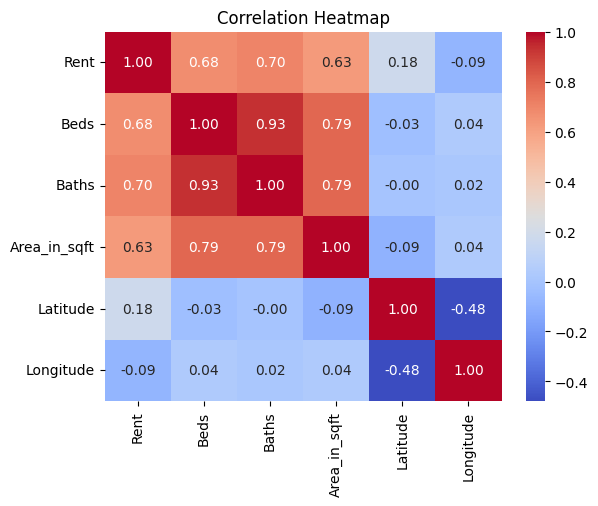

In [12]:
corr_matrix = QHS_Clean.corr(numeric_only=True)

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Show the plot
plt.title('Correlation Heatmap')
plt.show()


# Interpreting the Correlation Heatmap

The heatmap confirms that the main drivers of rent in your dataset are the size and configuration of the property (number of bedrooms, bathrooms, and area). Geographical coordinates have a much smaller influence on rent, but may still be useful in combination with other features. This supports your approach of using these variables as features and paying special attention to text/geospatial variables in more advanced models.

**1.   Correlation with Rent (Target Variable)**
*   **Baths (0.70) and Beds (0.68)** show the strongest positive correlation with Rent.
 *   **Interpretation:** Properties with more bathrooms and bedrooms tend to have higher rent values. This indicates that larger, more comfortable homes command higher prices.
* **Area_in_sqft (0.63)** also has a strong positive correlation with Rent.
 * **Interpretation:** The larger the property, the higher the rent, which is expected in real estate markets.
* **Latitude (0.18)** has a weak positive correlation with Rent.
 * **Interpretation:** There is a slight trend for properties located further north (higher latitude) to have higher rents, but this effect is much weaker than the effect of property size and room count.
* **Longitude (-0.09)** has a very weak negative correlation with Rent.
 * **Interpretation:** The east-west position of the property has little to no effect on rent, according to this dataset.

**2.   Correlation Among Explanatory Variables**
* **Beds and Baths (0.93):**
 * **Interpretation:** There is a very strong correlation between the number of bedrooms and bathrooms. Most properties with more bedrooms also have more bathrooms, which is typical for larger or more luxurious homes.
 * **Modeling Note:** Such high correlation (multicollinearity) can affect linear models, but is less problematic for tree-based models like Random Forest.
* **Beds and Area_in_sqft (0.79), Baths and Area_in_sqft (0.79):**
 * **Interpretation:** Larger properties (by area) tend to have more bedrooms and bathrooms, which is logical.

**3.   Geographical Correlations**
* **Latitude and Longitude (-0.48):**
 * **Interpretation:** There is a moderate negative correlation between latitude and longitude, suggesting a geographic trend in the dataset (e.g., properties further north are also more to the west or east).
* **Latitude with other variables:** Very weak correlations, close to zero.
 * **Interpretation:** The geographic location alone (latitude/longitude) does not directly determine the size or configuration of the property.

**4.   Conclusions**
*   **Baths, Beds, and Area_in_sqft** are the most important direct numerical predictors for Rent.
*   **Latitude and Longitude** have low predictive power individually, but may become more important when combined with other features (e.g., NLP-processed Location).
*   **Multicollinearity** among Beds, Baths, and Area_in_sqft should be considered for linear models, but is less of a concern for Random Forests or other ensemble methods.
*   **Recommendation:** For linear models, consider removing one of the highly correlated variables (e.g., Baths or Beds) to reduce redundancy.

In [13]:
QHS_Clean['Location'].value_counts

<bound method IndexOpsMixin.value_counts of 0         Al Reem Island
1             Yas Island
2          Al Raha Beach
3         Al Reem Island
4             Yas Island
             ...        
994            Al Muroor
995         Khalifa City
996         Al Shawamekh
997         Khalifa City
998    Madinat Al Riyadh
Name: Location, Length: 999, dtype: object>

In [14]:
#Since Location isn't specific we will remove it from the dataset.
QHS_Clean.drop('Location', axis=1,inplace=True)

In [15]:
#Since Lat and Long aren't that usefull in the heatmap, we will perform cluster analysis to get information out of them.abs

# Aici te rog Irina sa continui, facand un Cluster analysis pe QHS_Clean. Ideea e sa avem inca o coloana in tabelul nostru QHS_cleaned care sa prezinte numarul de cluster.

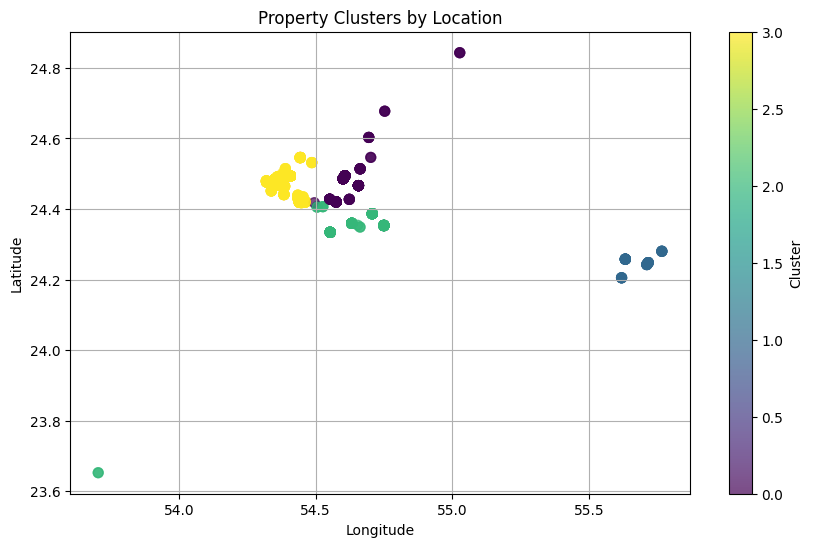

,Rent,Beds,Baths,Area_in_sqft,Latitude,Longitude
Cluster,,,,,,
0,128839.123288,2.610959,3.586301,2329.391781,24.472253,54.609834
1,87201.023810,2.476190,3.095238,1957.190476,24.248617,55.681512
2,78911.202247,2.438202,3.297753,2749.595506,24.351177,54.649548
3,111953.289604,2.148515,3.007426,1790.690594,24.477786,54.393431


In [16]:
# Step 1: Select numeric columns for clustering
X = QHS_Clean[[ 'Latitude', 'Longitude']]
X = X.dropna()  # Remove rows with missing values

# Step 2: Keep only matching rows in the main DataFrame
QHS_filtered = QHS_Clean.loc[X.index].copy()

# Step 3: Scale the data (very important for KMeans)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Apply KMeans clustering with 4 clusters
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
QHS_filtered['Cluster'] = kmeans.fit_predict(X_scaled)

# Step 5: Visualize the clusters based on geographic location
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(QHS_filtered['Longitude'], QHS_filtered['Latitude'],
            c=QHS_filtered['Cluster'], cmap='viridis', s=50, alpha=0.7)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Property Clusters by Location")
plt.colorbar(label="Cluster")
plt.grid(True)
plt.show()

# Step 6: Display cluster averages for interpretation
QHS_filtered.groupby("Cluster").mean(numeric_only=True)



### 📌 Cluster Interpretation Summary based solely on location

**Cluster 0 – 🟣**  
- **Average Rent**: ~56,000 AED  
- **Property Type**: Small units (< 1,000 sqft), less than 1 bedroom on average  
- **Location**: Around latitude 24.44, longitude 54.53  
- **Interpretation**: Likely budget apartments or studios in a more affordable area  

---

**Cluster 1 – 🟢**  
- **Average Rent**: ~131,000 AED  
- **Property Type**: ~2.7 bedrooms, ~2,000 sqft  
- **Location**: More central area  
- **Interpretation**: Likely family apartments or townhouses in mid-range locations  

---

**Cluster 2 – 🔵**  
- **Average Rent**: ~86,000 AED  
- **Property Type**: ~2.5 bedrooms, ~1,943 sqft  
- **Location**: Further east (longitude ~55.59)  
- **Interpretation**: Spacious but less central properties; more affordable due to location  

---

**Cluster 3 – 🟡**  
- **Average Rent**: ~204,000 AED  
- **Property Type**: Very large properties (~6,000+ sqft), ~5 bedrooms  
- **Location**: Around latitude 24.42, longitude 54.56  
- **Interpretation**: Likely luxury villas or penthouses in high-demand, upscale areas  


In [17]:
# Create the same cluster column for the full QHS_Clean (even if some rows were skipped before)
QHS_Clean['Cluster'] = np.nan  # Start with NaN values

# Fill only the rows that were used for KMeans (those in X.index)
QHS_Clean.loc[QHS_filtered.index, 'Cluster'] = QHS_filtered['Cluster']

# Check that clusters were added correctly
FCD=QHS_Clean[['Beds','Type', 'Furnishing', 'Baths', 'Area_in_sqft', 'Cluster','Rent']]

In [18]:
#cleaning 10 null values for the clusters

print(FCD.shape)
print(FCD.isna().sum())
FCD.dropna(inplace=True)
print(FCD.shape)
FCD.reset_index(drop=True, inplace=True)


(999, 7)
Beds             0
Type             0
Furnishing       0
Baths            0
Area_in_sqft     0
Cluster         10
Rent             0
dtype: int64
(989, 7)


**Multiple Linear Regression (Linear Regression Coefficient, Hyperparametrization, cost dimensionality)**

In [19]:
# Assume QHS_Clean exists and is cleaned of nulls

# 1. Encode categorical variables
QHS_encoded = pd.get_dummies(QHS_Clean, columns=['Type', 'Furnishing'], drop_first=True)

# 2. Separate features and target
X = QHS_encoded.drop('Rent', axis=1)
y = QHS_encoded['Rent']

# 3. Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Scale numerical features only (for linear regression scaling is optional but recommended)
num_features = ['Beds', 'Baths', 'Area_in_sqft', 'Latitude', 'Longitude']
scaler = StandardScaler()

X_train[num_features] = scaler.fit_transform(X_train[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])

**Fit Linear Regression and inspect coefficients**

In [20]:
# Assume QHS_Clean exists and is cleaned of nulls

# 1. Encode categorical variables
QHS_encoded = pd.get_dummies(QHS_Clean, columns=['Type', 'Furnishing'], drop_first=True)

# **FIX:** Drop rows with NaN values *after* encoding and *before* splitting
# Check for NaN values in the encoded DataFrame before dropping
print("NaN values before dropping:")
print(QHS_encoded.isna().sum())
QHS_encoded.dropna(inplace=True)
print("\nNaN values after dropping:")
print(QHS_encoded.isna().sum())
print("Shape after dropping NaN values:", QHS_encoded.shape)


# 2. Separate features and target
X = QHS_encoded.drop('Rent', axis=1)
y = QHS_encoded['Rent']

# 3. Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Scale numerical features only (for linear regression scaling is optional but recommended)
# Ensure the features list includes 'Cluster' if it's being used and is numeric
num_features = ['Beds', 'Baths', 'Area_in_sqft', 'Latitude', 'Longitude', 'Cluster']
scaler = StandardScaler()

# Use .loc to avoid SettingWithCopyWarning
X_train.loc[:, num_features] = scaler.fit_transform(X_train[num_features])
X_test.loc[:, num_features] = scaler.transform(X_test[num_features])

# Fit the model
from sklearn.linear_model import LinearRegression # Import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

# Coefficients & feature names
coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lr.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

print(coef_df)

NaN values before dropping:
Rent                       0
Beds                       0
Baths                      0
Area_in_sqft               0
Latitude                  10
Longitude                 10
Cluster                   10
Type_Penthouse             0
Type_Townhouse             0
Type_Villa                 0
Type_Villa Compound        0
Furnishing_Unfurnished     0
dtype: int64

NaN values after dropping:
Rent                      0
Beds                      0
Baths                     0
Area_in_sqft              0
Latitude                  0
Longitude                 0
Cluster                   0
Type_Penthouse            0
Type_Townhouse            0
Type_Villa                0
Type_Villa Compound       0
Furnishing_Unfurnished    0
dtype: int64
Shape after dropping NaN values: (989, 12)
                   Feature   Coefficient
9      Type_Villa Compound  92323.404799
7           Type_Townhouse  68987.453654
6           Type_Penthouse  62773.004019
10  Furnishing_Unfurnished 

**1.3 Model performance evaluation**

In [21]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test MSE: {mse:.2f}")
print(f"Test R2: {r2:.2f}")
#Initialising dict for various models
dict_r2score={}
dict_r2score['Linear Regression (Perceptron)']=r2


Test MSE: 1496276882.23
Test R2: 0.66


Hyperparameter Tuning (Regularization)
Multiple Linear Regression doesn’t have hyperparameters, but Ridge and Lasso regression add regularization parameters (alpha) that control overfitting.

2.1 Ridge Regression example (L2 regularization)

In [22]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()

# Try different alpha values
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print(f"Best alpha: {grid_search.best_params_['alpha']}")

# Evaluate best model
best_ridge = grid_search.best_estimator_
y_pred_ridge = best_ridge.predict(X_test)

print(f"Ridge Test MSE: {mean_squared_error(y_test, y_pred_ridge):.2f}")
print(f"Ridge Test R2: {r2_score(y_test, y_pred_ridge):.2f}")


Best alpha: 0.1
Ridge Test MSE: 1496600983.35
Ridge Test R2: 0.66


Step 3: Cost & Dimensionality Considerations


3.1 Plot learning curve (MSE over training set size)

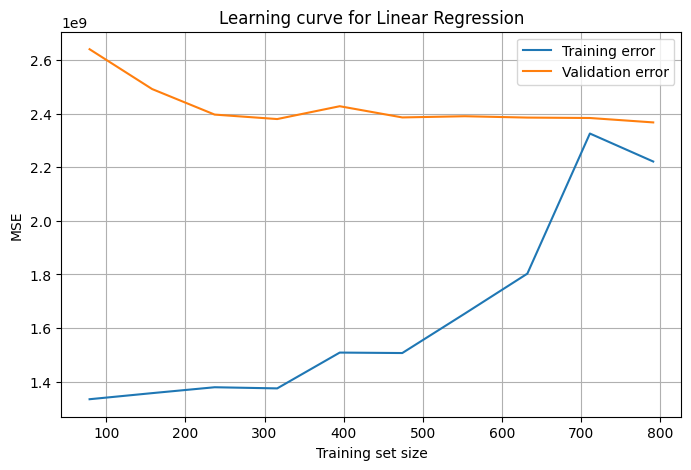

In [23]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(
    lr, X, y, cv=5, scoring='neg_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 10), random_state=42)

train_errors = -train_scores.mean(axis=1)
test_errors = -test_scores.mean(axis=1)

plt.figure(figsize=(8,5))
plt.plot(train_sizes, train_errors, label='Training error')
plt.plot(train_sizes, test_errors, label='Validation error')
plt.xlabel('Training set size')
plt.ylabel('MSE')
plt.title('Learning curve for Linear Regression')
plt.legend()
plt.grid(True)
plt.show()



**Check Variance Inflation Factor (VIF) — to quantify multicollinearity**

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Use only numeric features for VIF calculation
X_numeric = QHS_encoded[['Beds', 'Baths', 'Area_in_sqft', 'Latitude', 'Longitude']]

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_numeric.columns
vif_data["VIF"] = [variance_inflation_factor(X_numeric.values, i) for i in range(X_numeric.shape[1])]

print(vif_data)


        Feature           VIF
0          Beds     25.196299
1         Baths     31.551035
2  Area_in_sqft      6.026744
3      Latitude  20138.196451
4     Longitude  20126.850192


VIF > 5 or 10 indicates high multicollinearity.

**3.2. Drop one of the highly correlated variables**

Since Beds, Baths, and Area_in_sqft are highly correlated, drop one (lets say Baths) and retrain:

In [25]:
X_reduced = X.drop(['Baths'], axis=1)  # Drop Baths

# Split again
X_train_red, X_test_red, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Scale numeric features again
num_features_red = ['Beds', 'Area_in_sqft', 'Latitude', 'Longitude']
scaler_red = StandardScaler()
X_train_red[num_features_red] = scaler_red.fit_transform(X_train_red[num_features_red])
X_test_red[num_features_red] = scaler_red.transform(X_test_red[num_features_red])

# Fit Linear Regression
lr_red = LinearRegression()
lr_red.fit(X_train_red, y_train)

print("Coefficients after dropping Baths:")
print(pd.DataFrame({'Feature': X_train_red.columns, 'Coefficient': lr_red.coef_}))

# Evaluate
y_pred_red = lr_red.predict(X_test_red)
print(f"R2 score: {r2_score(y_test, y_pred_red):.3f}")
dict_r2score['Linear Regression (Reduced)']=r2_score(y_test, y_pred_red)


Coefficients after dropping Baths:
                  Feature   Coefficient
0                    Beds  36802.257355
1            Area_in_sqft  23080.124984
2                Latitude  10134.807877
3               Longitude  -3952.073975
4                 Cluster   -717.058965
5          Type_Penthouse  71611.687736
6          Type_Townhouse  71857.992776
7              Type_Villa  -4492.796492
8     Type_Villa Compound  79026.253679
9  Furnishing_Unfurnished -36236.537624
R2 score: 0.646


3. Apply Principal Component Analysis (PCA) — reduce correlated features into components

In [26]:
from sklearn.decomposition import PCA

# Apply PCA only on numeric features (after scaling)
X_num = X[num_features]
X_num_scaled = scaler.fit_transform(X_num)

pca = PCA(n_components=2)  # reduce to 2 components capturing most variance
X_pca = pca.fit_transform(X_num_scaled)

print(f"Explained variance ratio by components: {pca.explained_variance_ratio_}")

# Combine PCA components with categorical variables
X_cat = X.drop(columns=num_features)  # categorical dummy vars

# Create final DataFrame
import numpy as np
X_pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'], index=X.index)
X_final = pd.concat([X_pca_df, X_cat], axis=1)

# Split
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

# Fit Linear Regression on PCA data
lr_pca = LinearRegression()
lr_pca.fit(X_train_pca, y_train)

print(f"R2 score with PCA features: {r2_score(y_test, lr_pca.predict(X_test_pca)):.3f}")



Explained variance ratio by components: [0.4530139  0.26856469]
R2 score with PCA features: 0.654


We could use VIF to identify problematic features.

If we drop one or more highly correlated variables if interpretability is important.

Using PCA if we want to keep all info but reduce dimensionality and multicollinearity.

**Neuronal Network (Linear Regression Coefficient, Hyperparametrization, cost dimensionality)**

In [27]:
FCD.isna().sum()
FCD.shape

(989, 7)

In [28]:
#dummy coding the categorical variables
df_encoded=pd.get_dummies(FCD,drop_first=True)

In [29]:
print(df_encoded.head())

   Beds  Baths  Area_in_sqft  Cluster    Rent  Type_Penthouse  Type_Townhouse  \
0     3      4          1785      3.0  124000           False           False   
1     3      4          1422      0.0  140000           False           False   
2     2      3          1314      0.0   99000           False           False   
3     3      4          3843      3.0  220000            True           False   
4     5      7          6860      0.0  350000           False           False   

   Type_Villa  Type_Villa Compound  Furnishing_Unfurnished  
0       False                False                    True  
1       False                False                    True  
2       False                False                   False  
3       False                False                    True  
4        True                False                    True  


In [30]:
#Defining features (X) and target (y)
X=df_encoded.drop('Rent',axis=1)
y=df_encoded['Rent']
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
#Scaling the continuous variables

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.select_dtypes(include=['number']))
X_test_scaled = scaler.transform(X_test.select_dtypes(include=['number']))

In [32]:
print("Shape of the X: ", X_train_scaled.shape)
print("Number of X variables: ", X_train_scaled.shape[1])

Shape of the X:  (791, 4)
Number of X variables:  4


In [33]:
print(X_train_scaled[0])

[ 0.35146732 -0.14994638  0.87632053 -1.19045758]


In [34]:
model = Sequential()
model.add(Input(shape=(X_train_scaled.shape[1],)))
model.add(Dense(32, activation='relu'))#one hidden layer should be enough for this type of problem
model.add(Dense(1, activation='linear'))#relu or linear the same

In [35]:
import tensorflow.keras.backend as K
model.compile(optimizer='Adam',
              loss='mse',
              metrics=['mse'])


In [36]:
model.fit(X_train_scaled, y_train, epochs=30, verbose=1)

Epoch 1/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 19202465792.0000 - mse: 19202465792.0000
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 19202373632.0000 - mse: 19202373632.0000 
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 19202271232.0000 - mse: 19202271232.0000 
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 19202150400.0000 - mse: 19202150400.0000 
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 19202007040.0000 - mse: 19202007040.0000 
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 19201835008.0000 - mse: 19201835008.0000 
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 19201636352.0000 - mse: 19201636352.0000 
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 19201409024.0000 - mse: 19201409024.0000 
Epoch 9/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 19201150976.0000 - mse: 19201150976.0000 
Epoch 10/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 19200858112.0000 - mse: 19200858112.0000 

In [37]:
# Assume FCD exists and is cleaned of nulls

#dummy coding the categorical variables
df_encoded=pd.get_dummies(FCD,drop_first=True)

print(df_encoded.head())

#Defining features (X) and target (y)
X=df_encoded.drop('Rent',axis=1)
y=df_encoded['Rent']
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling all features (numerical and dummy-encoded categorical)
# Note: Scaling dummy variables might not be strictly necessary depending on the
# model architecture, but it ensures consistent input dimensionality
# and can sometimes help convergence. StandardScaler works fine on 0s and 1s.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both train and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Shape of the X_train_scaled: ", X_train_scaled.shape)
print("Number of X variables: ", X_train_scaled.shape[1])

print(X_train_scaled[0])

model = Sequential()
# Use the correct input shape based on the scaled training data's features
model.add(Input(shape=(X_train_scaled.shape[1],)))
model.add(Dense(32, activation='relu')) # one hidden layer should be enough for this type of problem
model.add(Dense(1, activation='linear')) # relu or linear the same

# Import necessary callbacks
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
# Import Adam optimizer
from tensorflow.keras.optimizers import Adam # Ensure Adam is imported if not already

# Define Adam optimizer with a potentially adjusted learning rate
# Start with a standard learning rate (e.g., 0.001) or slightly lower if needed for stability
optimizer = Adam(learning_rate=0.001) # Using the imported Adam

model.compile(optimizer=optimizer, # Use the defined optimizer instance
              loss='mse',
              metrics=['mse'])

# Define Early Stopping callback
# Monitor validation loss, stop if it doesn't improve for 'patience' epochs
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True) # Increased patience

# Define ReduceLROnPlateau callback
# Reduce learning rate when validation loss has stopped improving
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1, min_lr=0.00001) # Increased patience

# Fit the model with callbacks
# Add validation_split to monitor loss on a portion of the training data
history = model.fit(X_train_scaled, y_train,
          epochs=200, # Increase epochs significantly, Early Stopping will manage it
          verbose=1,
          callbacks=[early_stopping, reduce_lr],
          validation_split=0.2) # Use 20% of training data for validation loss monitoring


from sklearn.metrics import r2_score
import numpy as np # Ensure numpy is imported for array conversion

# Predict on the test set
# Ensure the output is not NaN by checking and handling if necessary (though training fixes should prevent this)
y_pred = model.predict(X_test_scaled)

# Check for NaN/Inf in predictions and handle if they still occur (this is a safety check)
if np.isnan(y_pred).any() or np.isinf(y_pred).any():
    print("Warning: Predictions contain NaN or Inf values. Replacing with mean/median or investigating further training issues.")
    # A simple handling: replace NaNs/Infs with the mean of finite predictions
    finite_preds = y_pred[np.isfinite(y_pred)]
    if finite_preds.size > 0:
        mean_finite_pred = np.mean(finite_preds)
        y_pred[np.isnan(y_pred) | np.isinf(y_pred)] = mean_finite_pred
    else:
         # If all predictions are NaN/Inf, this approach won't work, need more robust handling
         print("Error: All predictions are NaN/Inf. Cannot calculate R2.")
         # You might choose to exit, raise an error, or assign a default value like 0
         r2 = -np.inf # Indicate a complete failure
else:
    # y_pred will be a numpy array of shape (n_samples, 1).
    # y_test is likely a pandas Series. Ensure they are compatible for r2_score.
    # Convert y_test to a numpy array of shape (n_samples, 1) for consistency
    y_test_array = y_test.values.reshape(-1, 1)

    # Calculate R²
    # Use the raw y_pred as it was trained on the unscaled y_train
    # Ensure both inputs to r2_score are numpy arrays
    r2 = r2_score(y_test_array, y_pred)
    print(f"R² Score on Test Set: {r2:.2f}")


# Print examples for verification
# Ensure these checks only run if y_pred does not contain NaNs or if NaNs were handled
if not (np.isnan(y_pred).any() or np.isinf(y_pred).any()):
    print("Example predicted value:", y_pred[0][0]) # Access the scalar value
    # Ensure y_test is accessed correctly if it's a Series
    print("Example actual value:", y_test.iloc[0]) # Use .iloc to access by integer position


# Optional: Plot training history to diagnose issues
# plt.figure(figsize=(10, 6))
# plt.plot(history.history['loss'], label='Training Loss (MSE)')
# plt.plot(history.history['val_loss'], label='Validation Loss (MSE)')
# plt.title('Model Loss During Training')
# plt.xlabel('Epoch')
# plt.ylabel('MSE')
# plt.legend()
# plt.grid(True)
# plt.show()

   Beds  Baths  Area_in_sqft  Cluster    Rent  Type_Penthouse  Type_Townhouse  \
0     3      4          1785      3.0  124000           False           False   
1     3      4          1422      0.0  140000           False           False   
2     2      3          1314      0.0   99000           False           False   
3     3      4          3843      3.0  220000            True           False   
4     5      7          6860      0.0  350000           False           False   

   Type_Villa  Type_Villa Compound  Furnishing_Unfurnished  
0       False                False                    True  
1       False                False                    True  
2       False                False                   False  
3       False                False                    True  
4        True                False                    True  
Shape of the X_train_scaled:  (791, 9)
Number of X variables:  9
[ 0.35146732 -0.14994638  0.87632053 -1.19045758 -0.05034734  3.62284419
 -0.49960

**Linear Neural Network (Basic Architecture)**

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import pandas as pd

# Assume FCD exists and is cleaned of nulls

# 1. Perform dummy encoding on the full dataset BEFORE splitting
# This ensures both train and test sets get the same columns and encoding
df_encoded = pd.get_dummies(FCD, columns=['Type', 'Furnishing'], drop_first=True)

print(df_encoded.head())

# 2. Define features (X) and target (y) from the encoded DataFrame
X_nn = df_encoded.drop('Rent', axis=1)
y_nn = df_encoded['Rent']

# 3. Train/test split
# Split the *encoded* data
X_train, X_test, y_train, y_test = train_test_split(X_nn, y_nn, test_size=0.2, random_state=42)

# 4. Scale features
# Now all columns in X_train and X_test are numeric (original numeric + dummy variables)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both train and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Shape of the X_train_scaled: ", X_train_scaled.shape)
print("Number of X variables: ", X_train_scaled.shape[1])

print(X_train_scaled[0])

# Step 4: Build linear NN model
model_linear = Sequential([
    # Use the correct input shape based on the scaled training data's features
    Dense(1, input_dim=X_train_scaled.shape[1])  # linear regression-like
])

# Step 5: Compile model
model_linear.compile(optimizer='adam', loss='mse')

# Step 6: Train model
# Setting verbose=1 to see training progress
history_linear = model_linear.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=1)

# Step 7: Evaluate
y_pred_nn = model_linear.predict(X_test_scaled).flatten()
print(f"R² Score (Linear NN): {r2_score(y_test, y_pred_nn):.3f}")

dict_r2score['Linear NN (Perceptron)']=r2_score(y_test, y_pred_nn)

   Beds  Baths  Area_in_sqft  Cluster    Rent  Type_Penthouse  Type_Townhouse  \
0     3      4          1785      3.0  124000           False           False   
1     3      4          1422      0.0  140000           False           False   
2     2      3          1314      0.0   99000           False           False   
3     3      4          3843      3.0  220000            True           False   
4     5      7          6860      0.0  350000           False           False   

   Type_Villa  Type_Villa Compound  Furnishing_Unfurnished  
0       False                False                    True  
1       False                False                    True  
2       False                False                   False  
3       False                False                    True  
4        True                False                    True  
Shape of the X_train_scaled:  (791, 9)
Number of X variables:  9
[ 0.35146732 -0.14994638  0.87632053 -1.19045758 -0.05034734  3.62284419
 -0.49960

**Neural Network with Hyperparameter Tuning (Hidden Layers, Activations, Optimizer)**

In [39]:
# Step 1: Build deep NN model
model_deep = Sequential([
    Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')  # Output layer
])

# Step 2: Compile model with custom learning rate
optimizer = Adam(learning_rate=0.001)
model_deep.compile(optimizer=optimizer, loss='mse')

# Step 3: Train
history_deep = model_deep.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=0)

# Step 4: Predict and evaluate
y_pred_deep = model_deep.predict(X_test_scaled).flatten()
print(f"R² Score (Deep NN): {r2_score(y_test, y_pred_deep):.3f}")
dict_r2score['Multilayer 64, 32']=r2_score(y_test, y_pred_deep)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
R² Score (Deep NN): 0.327


In [40]:
# Step 1: Build deep NN model
model_deep = Sequential([
    Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]),
    Dense(32, activation='relu'),
    Dense(16,activation='relu'),
    Dense(1, activation='linear')  # Output layer
])

# Step 2: Compile model with custom learning rate
optimizer = Adam(learning_rate=0.001)
model_deep.compile(optimizer=optimizer, loss='mse')

# Step 3: Train
history_deep = model_deep.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=0)

# Step 4: Predict and evaluate
y_pred_deep = model_deep.predict(X_test_scaled).flatten()
print(f"R² Score (Deep NN): {r2_score(y_test, y_pred_deep):.3f}")
dict_r2score['Multilayer 64, 32, 16']=r2_score(y_test, y_pred_deep)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
R² Score (Deep NN): 0.596


In [41]:
# Step 1: Build deep NN model
model_deep = Sequential([
    Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]),
    Dense(32, activation='relu'),
    Dense(16,activation='relu'),
    Dense(8,activation='relu'),
    Dense(1, activation='linear')  # Output layer
])

# Step 2: Compile model with custom learning rate
optimizer = Adam(learning_rate=0.001)
model_deep.compile(optimizer=optimizer, loss='mse')

# Step 3: Train
history_deep = model_deep.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=0)

# Step 4: Predict and evaluate
y_pred_deep = model_deep.predict(X_test_scaled).flatten()
print(f"R² Score (Deep NN): {r2_score(y_test, y_pred_deep):.3f}")
dict_r2score['Multilayer 64, 32, 16, 8']=r2_score(y_test, y_pred_deep)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
R² Score (Deep NN): 0.613


In [42]:
# Step 1: Build deep NN model
model_deep = Sequential([
    Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]),
    Dense(32, activation='relu'),
    Dense(16,activation='relu'),
    Dense(8,activation='relu'),
    Dense(4,activation='relu'),
    Dense(1, activation='linear')  # Output layer
])

# Step 2: Compile model with custom learning rate
optimizer = Adam(learning_rate=0.001)
model_deep.compile(optimizer=optimizer, loss='mse')

# Step 3: Train
history_deep = model_deep.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=0)

# Step 4: Predict and evaluate
y_pred_deep = model_deep.predict(X_test_scaled).flatten()
print(f"R² Score (Deep NN): {r2_score(y_test, y_pred_deep):.3f}")
dict_r2score['Multilayer 64, 32, 16, 8, 4']=r2_score(y_test, y_pred_deep)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step
R² Score (Deep NN): 0.625


In [43]:
# Step 1: Build deep NN model
model_deep = Sequential([
    Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]),
    Dense(32, activation='relu'),
    Dense(16,activation='relu'),
    Dense(8,activation='relu'),
    Dense(4,activation='relu'),
    Dense(2,activation='relu'),
    Dense(1, activation='linear')  # Output layer
])

# Step 2: Compile model with custom learning rate
optimizer = Adam(learning_rate=0.001)
model_deep.compile(optimizer=optimizer, loss='mse')

# Step 3: Train
history_deep = model_deep.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=0)

# Step 4: Predict and evaluate
y_pred_deep = model_deep.predict(X_test_scaled).flatten()
print(f"R² Score (Deep NN): {r2_score(y_test, y_pred_deep):.3f}")
dict_r2score['Multilayer 64, 32, 16, 8, 4, 2']=r2_score(y_test, y_pred_deep)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
R² Score (Deep NN): 0.638


3. Cost Function Visualization (MSE Loss Curve)

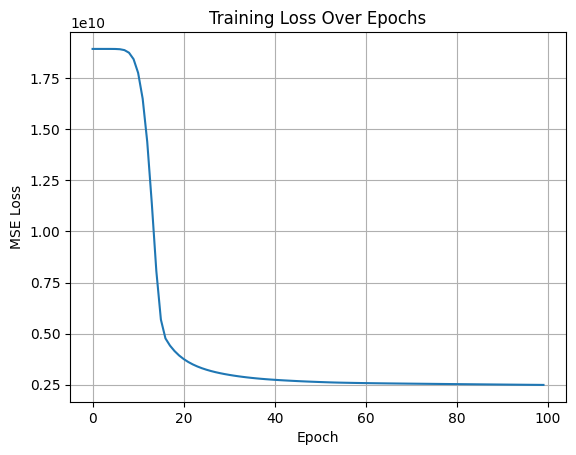

In [44]:
plt.plot(history_deep.history['loss'])
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.grid(True)
plt.show()


4. Dimensionality Reduction for Neural Networks (Using PCA)

In [45]:
from sklearn.decomposition import PCA

# Apply PCA before feeding into NN
pca = PCA(n_components=5)  # Reduce to 5 principal components
X_pca_train = pca.fit_transform(X_train_scaled)
X_pca_test = pca.transform(X_test_scaled)

# Define a shallow network on PCA features
model_pca = Sequential([
    Dense(16, activation='relu', input_dim=X_pca_train.shape[1]),
    Dense(1)
])

model_pca.compile(optimizer='adam', loss='mse')
model_pca.fit(X_pca_train, y_train, epochs=100, batch_size=32, verbose=0)

y_pred_pca = model_pca.predict(X_pca_test).flatten()
print(f"R² Score (NN with PCA): {r2_score(y_test, y_pred_pca):.3f}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
R² Score (NN with PCA): -2.400


Optional: Early Stopping for Regularization

In [46]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

model_reg = Sequential([
    Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]),
    Dense(32, activation='relu'),
    Dense(1)
])
model_reg.compile(optimizer='adam', loss='mse')
model_reg.fit(X_train_scaled, y_train, epochs=300, batch_size=32, verbose=0, callbacks=[early_stop])


**Final Decisions & Result Summery**

| Step              | Goal                                  |
| ----------------- | ------------------------------------- |
| **Linear NN**     | Reproduce linear regression           |
| **Deep NN**       | Add non-linearity, improve accuracy   |
| **Loss Curve**    | Visualize cost (MSE) over epochs      |
| **PCA**           | Reduce multicollinearity & dimensions |
| **EarlyStopping** | Prevent overfitting                   |
**bold text**

{'Linear Regression (Perceptron)': 0.6630287353703914, 'Linear Regression (Reduced)': 0.6463803010165545, 'Linear NN (Perceptron)': -2.4076411724090576, 'Multilayer 64, 32': 0.32719653844833374, 'Multilayer 64, 32, 16': 0.596127450466156, 'Multilayer 64, 32, 16, 8': 0.6133127212524414, 'Multilayer 64, 32, 16, 8, 4': 0.6248438954353333, 'Multilayer 64, 32, 16, 8, 4, 2': 0.6379514932632446}
                            model  r2_score
0  Linear Regression (Perceptron)      0.66
1     Linear Regression (Reduced)      0.65
7  Multilayer 64, 32, 16, 8, 4, 2      0.64
6     Multilayer 64, 32, 16, 8, 4      0.62
5        Multilayer 64, 32, 16, 8      0.61
4           Multilayer 64, 32, 16      0.60
3               Multilayer 64, 32      0.33
2          Linear NN (Perceptron)     -2.41


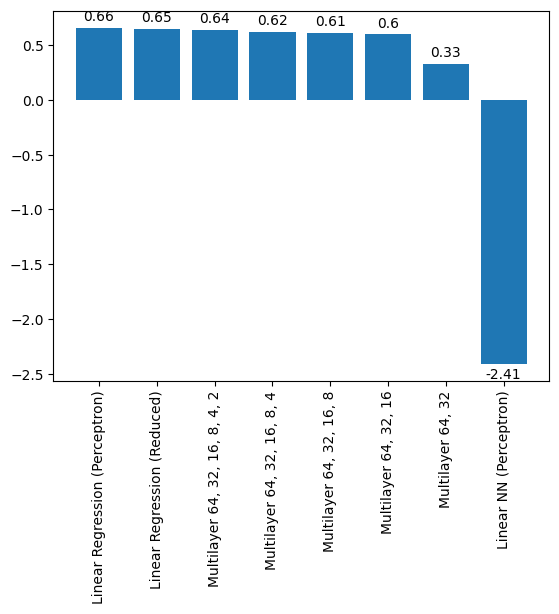

In [47]:

df_r2_score=pd.DataFrame(list(dict_r2score.items()), columns=['model', 'r2_score'])
print(dict_r2score)
#creating data frame and roundin to two digit
df_r2_score['r2_score']=df_r2_score['r2_score'].round(2)
df_r2_score.sort_values(by='r2_score', ascending=False, inplace=True)
print(df_r2_score)
fig, ax = plt.subplots()
bars = ax.bar(df_r2_score['model'],df_r2_score['r2_score'] )
plt.bar_label(bars, padding=3)   # auto‐adds the heights above each bar
ax.set_xticklabels(df_r2_score['model'],
                   rotation=90,
                   ha='center',
                   fontsize=10)

plt.show()
